<a href="https://colab.research.google.com/github/iishutov/CV-Project/blob/master/ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, regularizers
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [100]:
train_dir_zip = '/content/drive/MyDrive/ML/my-dataset/train.zip'
test_dir_zip = '/content/drive/MyDrive/ML/my-dataset/test.zip'

train_dir = '/content/train'
test_dir = '/content/test'

batch_size = 32
rescale = 1./255
img_height = img_width = 64

In [101]:
# import folders with dataset and unzip them.
with zipfile.ZipFile(train_dir_zip, 'r') as zip_ref:
    zip_ref.extractall(train_dir)
with zipfile.ZipFile(test_dir_zip, 'r') as zip_ref:
    zip_ref.extractall(test_dir)

In [102]:
# Training dataset preprocessing
train_datagen = ImageDataGenerator(
    rescale=rescale,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_dataset = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    seed=42,
)

Found 633 images belonging to 2 classes.


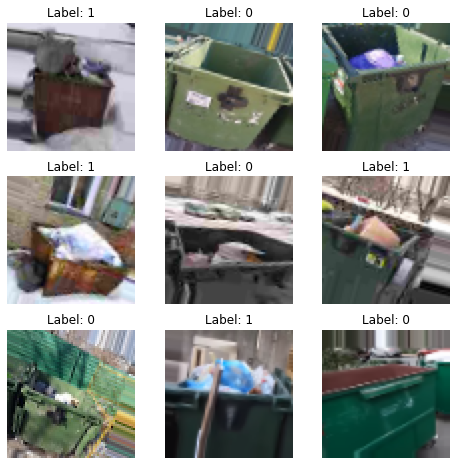

In [103]:
# Show the resulted training dataset after augmentation.
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i in range(3):
    for j in range(3):
        image, label = train_dataset.next()
        axs[i,j].imshow(image[0])
        axs[i,j].set_title(f'Label: {(int)(label[0])}')
        axs[i,j].axis('off')
plt.show()

In [107]:
# ImageDataGenerator does not increase the size of the dataset.
train_dataset.n

633

In [108]:
# Testing dataset preprocessing (normalization).
test_datagen = ImageDataGenerator(rescale=rescale)

test_dataset = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False,
    seed=42
)

Found 160 images belonging to 2 classes.


In [111]:
# Building the convolutional base.
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# Adding Dense Layers.
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_67 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_61 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_63 (MaxPoolin  (None, 8, 8, 128)      

Epoch 1/30
20/20 [==============================] - 11s 461ms/step - loss: 1.2092 - accuracy: 0.5735 - val_loss: 1.0285 - val_accuracy: 0.5688
Epoch 2/30
20/20 [==============================] - 9s 431ms/step - loss: 0.9106 - accuracy: 0.5940 - val_loss: 0.8491 - val_accuracy: 0.5500
Epoch 3/30
20/20 [==============================] - 11s 535ms/step - loss: 0.7623 - accuracy: 0.6667 - val_loss: 0.7557 - val_accuracy: 0.6375
Epoch 4/30
20/20 [==============================] - 8s 406ms/step - loss: 0.7103 - accuracy: 0.6793 - val_loss: 0.7373 - val_accuracy: 0.6375
Epoch 5/30
20/20 [==============================] - 11s 534ms/step - loss: 0.6623 - accuracy: 0.7062 - val_loss: 0.6752 - val_accuracy: 0.6875
Epoch 6/30
20/20 [==============================] - 11s 547ms/step - loss: 0.6066 - accuracy: 0.7267 - val_loss: 0.8110 - val_accuracy: 0.6625
Epoch 7/30
20/20 [==============================] - 10s 509ms/step - loss: 0.5613 - accuracy: 0.7694 - val_loss: 0.5223 - val_accuracy: 0.8125
E

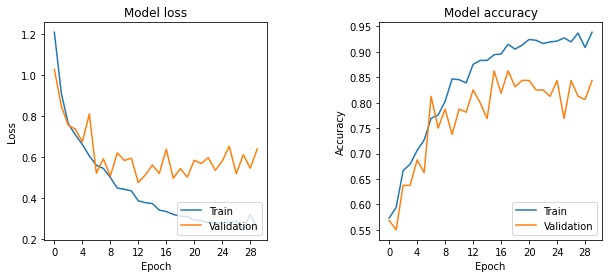

In [112]:
# Training the model.
model.compile(
    optimizer='adam',
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
    )

history = model.fit(train_dataset, epochs=30, validation_data=test_dataset)
#

# Visualizing loss and accuracy.
fig, (axs_loss, axs_acc) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

axs_loss.set_title('Model loss')
axs_loss.set_ylabel('Loss')
axs_loss.set_xlabel('Epoch')
axs_loss.plot(history.history['loss'], label='Train')
axs_loss.plot(history.history['val_loss'], label='Validation')
axs_loss.legend(loc='lower right')
axs_loss.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

axs_acc.set_title('Model accuracy')
axs_acc.set_ylabel('Accuracy')
axs_acc.set_xlabel('Epoch')
axs_acc.plot(history.history['accuracy'], label='Train')
axs_acc.plot(history.history['val_accuracy'], label='Validation')
axs_acc.legend(loc='lower right')
axs_acc.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

fig.subplots_adjust(wspace=0.5)
plt.show()

5/5 [==============================] - 1s 106ms/step


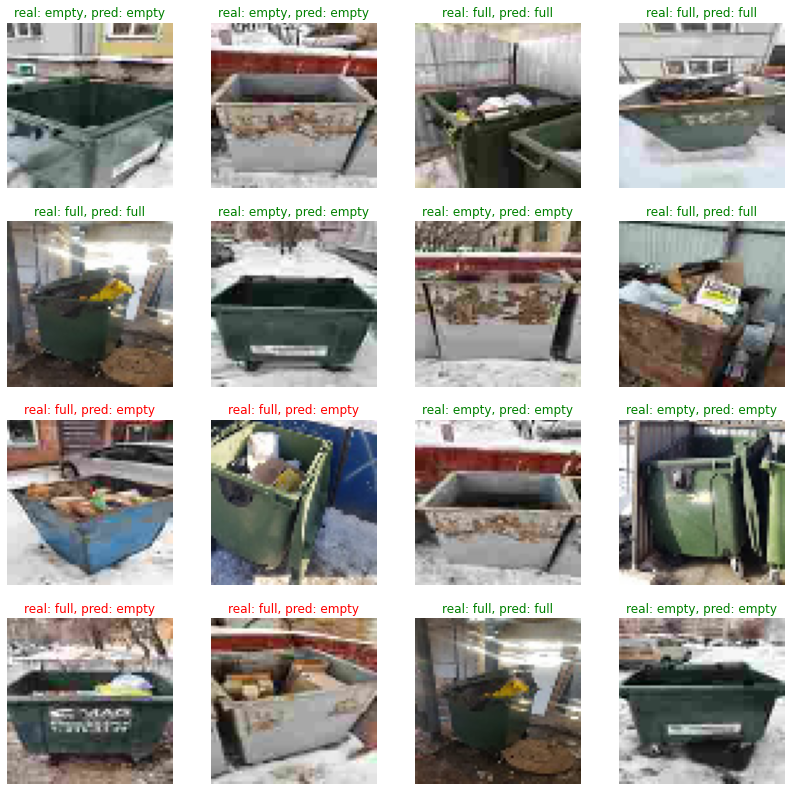

In [113]:
# Result.
predictions = model.predict(test_dataset)

idx = 0
rng = np.random.default_rng()
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(14,14))

for i in range(4):
  for j in range(4):
    image, label = test_dataset.next()
    _batch_size = label.shape[0]
    
    local_idx = (int)(_batch_size * rng.uniform())
    global_idx = (idx + local_idx) % len(predictions)

    real_class = 'full' if np.round(label[local_idx]) else 'empty'
    predicted_class = 'full' if np.round(predictions[global_idx][0]) else 'empty'

    axs[i,j].set_title(f'real: {real_class}, pred: {predicted_class}')\
      .set_color('green' if real_class == predicted_class else 'red')
    axs[i,j].imshow(image[local_idx])
    axs[i,j].axis('off')

    idx += _batch_size

plt.show()